In [1]:
import gmbp_common.utils.notebook_utils as nbu
nbu.set_width_global()
nbu.disable_auto_scroll()

import pandas as pd
import pandas_datareader.data as web
from gmbp_quant.dpl.finnhub.finnhub_stock_fundamental_api import request_news_sentiment
from gmbp_quant.dpl.finnhub.finnhub_stock_estimates_api import request_recommendation_trends
from gmbp_quant.dpl.finnhub.finnhub_alternative_data_api import request_social_sentiment
from gmbp_quant.dpl.fmp.fmp_company_valuation_api import request_rating_historical, request_dcf_historical
from gmbp_quant.dpl.fmp.fmp_stock_analysis_api import request_stock_grade
from gmbp_quant.dpl.fmp.fmp_institutional_fund_api import request_institutional_holders, request_mutual_fund_holders, get_top_holders

import seaborn as sns
sns.set()

<IPython.core.display.Javascript object>

In [2]:
symbol = 'ZM'

In [3]:
ihs = request_institutional_holders(symbol=symbol)
ihs.sort_values(['dateReported','shares'], ascending=False, inplace=True)
# ihs.head()

In [4]:
ihs.groupby('dateReported').apply(lambda x: get_top_holders(x))

Rank                                                R0  \
dateReported                                             
2020-06-30   holder  JUPITER INVESTMENT MANAGEMENT LTD   
             shares                            0.06459   
             change                            0.06459   
2020-09-30   holder                  POLAR CAPITAL LLP   
             shares                           0.168878   
             change                          -0.157711   
2020-12-31   holder                        NORGES BANK   
             shares                           1.351198   
             change                           1.302662   
2021-03-31   holder                     BLACKROCK INC.   
             shares                           11.25161   
             change                            0.53541   
2021-06-30   holder   PRICE T ROWE ASSOCIATES INC /MD/   
             shares                          17.839977   
             change                           5.302703   

Rank                                                   R1  \
dateReported                                                
2020-06-30   holder  NUMERIXS INVESTMENT TECHNOLOGIES INC   
             shares                              0.014916   
             change                              0.014916   
2020-09-30   holder                         PERPETUAL LTD   
             shares                              0.012606   
             change                             -0.021657   
2020-12-31   holder                     APERIO GROUP, LLC   
             shares                              0.081989   
             change                               0.01115   
2021-03-31   holder         ARK INVESTMENT MANAGEMENT LLC   
             shares                              3.002347   
             change                              2.047276   
2021-06-30   holder                        VANGUARD GROUP   
             shares                             12.968696   
             change                             12.968696   

Rank                                                    R2  \
dateReported                                                 
2020-06-30   holder                   BLUEFIN TRADING, LLC   
             shares                               0.002213   
             change                              -0.001328   
2020-09-30   holder   FIRST ALLIED ADVISORY SERVICES, INC.   
             shares                               0.006963   
             change                               0.002566   
2020-12-31   holder  MASSACHUSETTS INSTITUTE OF TECHNOLOGY   
             shares                               0.071339   
             change                               0.071339   
2021-03-31   holder       HILLHOUSE CAPITAL ADVISORS, LTD.   
             shares                               1.975966   
             change                              -1.005299   
2021-06-30   holder                         MORGAN STANLEY   
             shares                              12.384701   
             change                                    0.0   

Rank                                                   R3  \
dateReported                                                
2020-06-30   holder     FIDUCIARY TRUST INTERNATIONAL LLC   
             shares                              0.000808   
             change                              0.000808   
2020-09-30   holder         ETRADE CAPITAL MANAGEMENT LLC   
             shares                              0.003704   
             change                              0.001963   
2020-12-31   holder     LIONTRUST INVESTMENT PARTNERS LLP   
             shares                                0.0224   
             change                                0.0224   
2021-03-31   holder  SUMITOMO MITSUI TRUST HOLDINGS, INC.   
             shares                              1.859881   
             change                              0.807267   
2021-06-30   holder                        BlackRock Inc.   
     

In [8]:
mfhs = request_mutual_fund_holders(symbol=symbol)
mfhs.sort_values(['dateReported','shares'], ascending=False, inplace=True)

In [9]:
mfhs.groupby('dateReported').apply(lambda x: get_top_holders(x))

Rank                                                                    R0  \
dateReported                                                                 
2019-06-30   holder           Subfundusz Skarbiec - Spolek Wzrostowych FIO   
             shares                                                0.07295   
             change                                                0.07295   
             weightPercent                                            4.49   
2019-10-31   holder         Sands Capital Global Growth Fund;Institutional   
             shares                                               0.114254   
             change                                               0.114254   
             weightPercent                                             0.0   
2020-02-29   holder                     SMDS US Technology Innovators Fund   
             shares                                               0.012527   
             change                                               0.012527   
             weightPercent                                            0.78   
2020-03-31   holder            Fidelity Global Innovators Investment Trust   
             shares                                               0.374675   
             change                                              -0.498558   
             weightPercent                                             3.1   
2020-04-30   holder                 Old Westbury Large Cap Strategies Fund   
             shares                                               0.136844   
             change                                                    0.0   
             weightPercent                                            0.15   
2020-05-31   holder                                 MGI Global Equity Fund   
             shares                                               0.038244   
             change                                                    0.0   
             weightPercent                                            0.26   
2020-06-30   holder          Morgan Stanley Institutional Growth Portfolio   
             shares                                                2.52097   
             change                                               0.164772   
             weightPercent                                            5.55   
2020-07-31   holder                            Vanguard Mid-Cap Index Fund   
             shares                                                1.81315   
             change                                              -0.154894   
             weightPercent                                            0.41   
2020-08-31   holder                 Vanguard Total Stock Market Index Fund   
             shares                                                4.48762   
             change                                              -0.035798   
             weightPercent                                            0.16   
2021-02-02   holder                                 Schwab Charitable Fund   
             shares                                               0.000741   
             change                                               0.000741   
             weightPercent                                             NaN   
2021-02-09   holder                OREGON PUBLIC EMPLOYEES RETIREMENT FUND   
             shares                                                0.06992   
             change                                                0.06992   
             weightPercent                                             NaN   
2021-02-16   holder                              Anson Funds Management LP   
             shares                                                 0.0025   
             change                                                 0.0025   
             weightPercent                                             NaN   
2021-03-31   holder                      Shannon River Fund Management LLC   
             shares   

In [3]:
request_news_sentiment(symbol=symbol)

,companyNewsScore,sectorAverageBullishPercent,sectorAverageNewsScore,symbol,bearishPercent,bullishPercent,articlesInLastWeek,weeklyAverage
0,1,0.6552,0.5369,ZM,0,1,26,23


<AxesSubplot:xlabel='Date'>

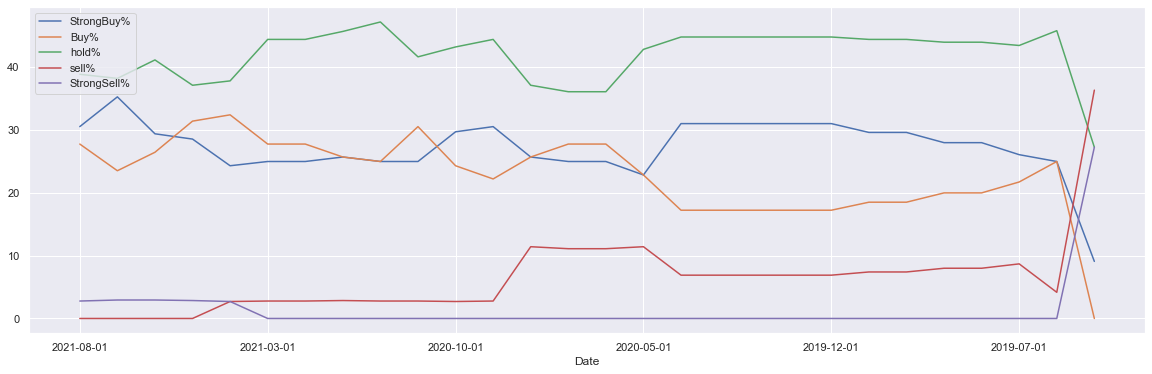

In [12]:
recommendation_trends = request_recommendation_trends(symbol=symbol)
recommendation_trends['Total'] = recommendation_trends.sum(axis=1)
recommendation_trends['StrongBuy%'] = recommendation_trends['strongBuy']/recommendation_trends['Total']*100.0
recommendation_trends['Buy%'] = recommendation_trends['buy']/recommendation_trends['Total']*100.0
recommendation_trends['hold%'] = recommendation_trends['hold']/recommendation_trends['Total']*100.0
recommendation_trends['sell%'] = recommendation_trends['sell']/recommendation_trends['Total']*100.0
recommendation_trends['StrongSell%'] = recommendation_trends['strongSell']/recommendation_trends['Total']*100.0
recommendation_trends.set_index('Date', inplace=True)
recommendation_trends[[col for col in recommendation_trends.columns if '%' in col]].plot(figsize=(20,6))

In [15]:
request_social_sentiment(symbol=symbol)

,atTime,mention,positiveScore,negativeScore,positiveMention,negativeMention,score
reddit,2021-08-26 23:00:00,1,0.968509,0,1,0,0.968509
reddit,2021-08-26 17:00:00,1,0.982604,0,1,0,0.982604


In [17]:
request_rating_historical(symbol=symbol)

,symbol,date,rating,ratingScore,ratingRecommendation,ratingDetailsDCFScore,ratingDetailsDCFRecommendation,ratingDetailsROEScore,ratingDetailsROERecommendation,ratingDetailsROAScore,ratingDetailsROARecommendation,ratingDetailsDEScore,ratingDetailsDERecommendation,ratingDetailsPEScore,ratingDetailsPERecommendation,ratingDetailsPBScore,ratingDetailsPBRecommendation
0,ZM,2021-08-26,A+,4,Buy,5,Strong Buy,3,Neutral,3,Neutral,3,Neutral,5,Strong Buy,5,Strong Buy
1,ZM,2021-08-25,A+,4,Buy,5,Strong Buy,3,Neutral,3,Neutral,3,Neutral,5,Strong Buy,5,Strong Buy
2,ZM,2021-08-24,A+,4,Buy,5,Strong Buy,3,Neutral,3,Neutral,3,Neutral,5,Strong Buy,5,Strong Buy
3,ZM,2021-08-23,A+,4,Buy,5,Strong Buy,3,Neutral,3,Neutral,3,Neutral,5,Strong Buy,5,Strong Buy
4,ZM,2021-08-20,A+,4,Buy,5,Strong Buy,3,Neutral,3,Neutral,3,Neutral,5,Strong Buy,5,Strong Buy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,ZM,2019-05-06,A-,4,Buy,4,Buy,3,Neutral,3,Neutral,3,Neutral,5,Strong Buy,3,Neutral
574,ZM,2019-05-03,A-,4,Buy,4,Buy,3,Neutral,3,Neutral,3,Neutral,5,Strong Buy,3,Neutral
575,ZM,2019-05-02,A-,4,Buy,4,Buy,3,Neutral,3,Neutral,3,Neutral,5,Strong Buy,3,Neutral
576,ZM,2019-05-01,A-,4,Buy,4,Buy,3,Neutral,3,Neutral,3,Neutral,5,Strong Buy,3,Neutral


In [26]:
dcf = request_dcf_historical(symbol=symbol)
dcf.sort_values('date', ascending=True, inplace=True)
dcf['Return'] = dcf['dcf'].pct_change()
hp = web.DataReader(symbol, 'yahoo', start=dcf['date'].min(), end=dcf['date'].max())
hp.rename(columns={'Adj Close': 'AdjClose'}, inplace=True)
hp['Return'] = hp['AdjClose'].pct_change()
dcf = pd.merge(dcf.set_index('date'), hp[['AdjClose','Return']], left_index=True, right_index=True, suffixes=('.DCF','.HP'))
dcf

,symbol,dcf,Return.DCF,AdjClose,Return.HP
2019-04-30,ZM,77.086290,NaN,72.470001,NaN
2019-05-01,ZM,77.376290,0.003762,72.760002,0.004002
2019-05-02,ZM,80.116290,0.035411,75.500000,0.037658
2019-05-03,ZM,83.796290,0.045933,79.180000,0.048742
2019-05-06,ZM,82.856290,-0.011218,78.239998,-0.011872
...,...,...,...,...,...
2021-08-20,ZM,341.958909,0.013275,336.859985,0.013478
2021-08-23,ZM,346.398909,0.012984,341.299988,0.013181
2021-08-24,ZM,345.348909,-0.003031,340.250000,-0.003076
2021-08-25,ZM,342.838909,-0.007268,337.739990,-0.007377


<AxesSubplot:>

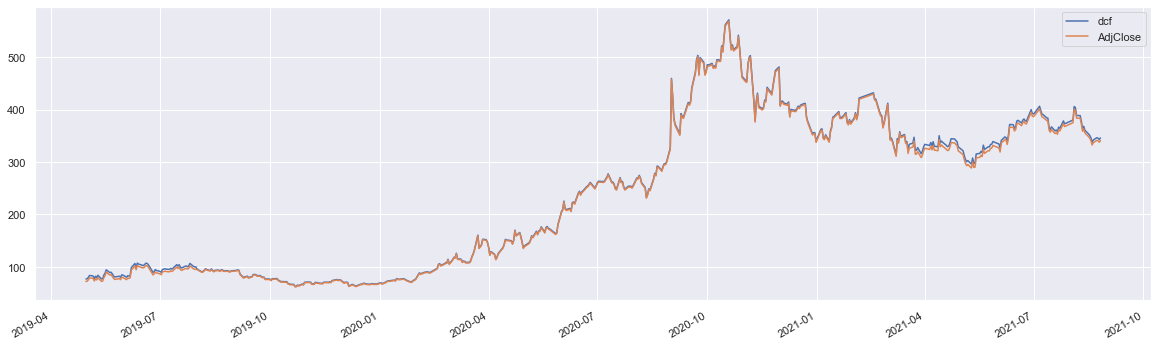

In [27]:
dcf[['dcf','AdjClose']].plot(figsize=(20,6))

In [37]:
grades = request_stock_grade(symbol=symbol)
# grades.set_index(['gradingCompany','date'], inplace=True)
# grades.head()

In [39]:
grades.groupby('gradingCompany').apply(lambda x : pd.DataFrame({'MinDate':[x['date'].min()], 'MaxDate':[x['date'].max()]})).sort_values('MaxDate', ascending=False)

,,MinDate,MaxDate
gradingCompany,,,
Keybanc,0,2021-07-29,2021-07-29
Benchmark,0,2021-07-15,2021-07-15
Needham,0,2020-03-17,2021-06-22
Argus Research,0,2021-06-10,2021-06-10
Citigroup,0,2020-05-15,2021-06-02
Piper Sandler,0,2020-03-05,2021-06-02
JP Morgan,0,2019-05-13,2021-06-02
BTIG,0,2020-04-16,2021-06-02
Daiwa Capital,0,2021-03-31,2021-03-31
